In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler

In [2]:
def model_evaluation(y_test, y_pred):
  print("model_evaluation method has started")
  cm=confusion_matrix(y_test, y_pred)
  cm_df=pd.DataFrame(cm,
                     index = [0,1,2,3],
                     columns = [0,1,2,3])
  tn=cm[0, 0]
  fn=cm[1, 0]+cm[2, 0]+cm[3, 0]
  tp=cm[1, 1]+cm[2, 2]+cm[3, 3]
  fp=cm[0, 1]+cm[0, 2]+cm[0, 3]

  accuracy=(tp+tn)/(tp+tn+fp+fn)
  precision_value=tp/(tp+fp)
  recall_value=tp/(tp+fn)
  senstivity=tp/(tp+fn)
  specificity=tn/(tn+fp)
  f1_score_value=(2*precision_value*recall_value)/(precision_value+recall_value)
  balanced_accuracy=(senstivity+specificity)/2
  a=tn*tp
  b=fp*fn
  c=tn+fn
  d=fp+tp
  e=tn+fp
  f=fn+tp
  res1=np.multiply(c, d, dtype=object)
  res2=np.multiply(e, f, dtype=object)
  res3=a-b
  res3=res3.astype(float)
  result=np.multiply(res1, res2, dtype=object)
  result_float=float(result)
  mcc=(res3)/np.sqrt(result_float)

  total_negative=tn+fn
  npv=tn/total_negative
  total_positive=tp+fp
  fdr=fp/total_positive
  cohen_kappa=cohen_kappa_score(y_test, y_pred)

  print("Confusion matrix = \n",cm)
  plt.figure(figsize=(5,5))
  log_cm= np.log1p(cm)
  cmap=LinearSegmentedColormap.from_list('custom_cmap', ['lightblue', 'darkblue'])
  sns.heatmap(cm_df, annot=log_cm, norm=LogNorm(), cmap=cmap)
  plt.title('Confusion Matrix')
  plt.ylabel('Actual Values', rotation=0, labelpad=25)
  plt.xlabel('Predicted Values')
  plt.show()
  print("Accuracy = ",round(accuracy,3))
  print("Precision = ",round(precision_value,3))
  print("Recall = ",round(recall_value,3))
  print("F1-Score = ",round(f1_score_value,3))
  print("Balanced accuracy score: ",round(balanced_accuracy,3))
  print("Matthews Correlation Coefficient (MCC): ",round(mcc,3))
  print("Negative predictive value: ",round(npv,3))
  print("False discovery rate: ",round(fdr,3))
  print("Cohen kappa score: ",round(cohen_kappa,3))
  print("model_evaluation method has ended")

In [3]:
def training_knn(X_scaled, y_train, selected_features):
  print("training_knn method has started")
  X_train_selected=X_scaled[:, selected_features]
  knn_model=KNeighborsClassifier()
  knn_model.fit(X_train_selected, y_train)
  print("training_knn method has ended")
  return knn_model

In [4]:
def testing_kNNClassifier(X_test, y_test, selected_features, knn_model):
  print("testing_kNNClassifier has started")
  X_test_selected=X_test[:, selected_features]
  y_pred=knn_model.predict(X_test_selected)
  model_evaluation(y_test, y_pred)
  print("testing_kNNClassifier has ended")

In [5]:
def evaluating_knn_model(knn_model, X_test, y_test, selected_features):
  print("evaluating_knn_model method has started")
  #Standardizing distribution of independent features in balanced test dataset using Robust Scaler
  scaler_test=RobustScaler()
  model_test=scaler_test.fit(X_test)
  X_test_scaled=model_test.transform(X_test)
  print("X_test_scaled: ",X_test_scaled)
  testing_kNNClassifier(X_test_scaled, y_test, selected_features, knn_model)
  print("evaluating_knn_model method has ended")

In [6]:
#Loading the training dataset
cic_df=pd.read_parquet("multiclass_training_data.parquet")

In [7]:
cic_df.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
0,2999994.0,4.0,0.0,2064.0,0.0,516.0,44.000000,0.000000,0.0,0.00,...,44.000000,0.00,4.0,2064.0,0.0,0.0,8192.0,3.0,20.0,3
1,11487.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25,...,108.666664,32.25,3.0,326.0,4.0,129.0,8192.0,1.0,20.0,1
2,9818.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25,...,108.666664,32.25,3.0,326.0,4.0,129.0,8192.0,1.0,20.0,1
3,10138.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25,...,108.666664,32.25,3.0,326.0,4.0,129.0,8192.0,1.0,20.0,1
4,109.0,3.0,1.0,53.0,0.0,53.0,17.666666,30.599564,0.0,0.00,...,17.666666,0.00,3.0,53.0,1.0,0.0,1080.0,1.0,20.0,0


In [8]:
cic_df.tail()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
82179,9749.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25000,...,108.666664,32.25000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0,1
82180,343659.0,3.0,2.0,1912.0,232.0,640.0,86.909088,137.688019,976.0,121.13636,...,86.909088,121.13636,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0,2
82181,5401.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.00000,2.0,0.0,0.0,0.0,32738.0,0.0,20.0,3
82182,412081.0,3.0,2.0,1912.0,232.0,640.0,83.130432,135.737488,976.0,121.13636,...,83.130432,121.13636,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0,2
82183,305105.0,12.0,0.0,97.0,0.0,440.0,44.000000,0.000000,0.0,0.00000,...,44.000000,0.00000,12.0,97.0,0.0,0.0,8192.0,1.0,20.0,3


In [9]:
cic_df.shape

(82184, 46)

In [10]:
#Dividing the dataset into Independent and Dependent features
X=cic_df.iloc[:, 0:-1]
y=cic_df.iloc[:, -1]

In [11]:
X

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min
0,2999994.0,4.0,0.0,2064.0,0.0,516.0,44.000000,0.000000,0.0,0.00000,...,99.500000,44.000000,0.00000,4.0,2064.0,0.0,0.0,8192.0,3.0,20.0
1,11487.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25000,...,65.000000,108.666664,32.25000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0
2,9818.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25000,...,65.000000,108.666664,32.25000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0
3,10138.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25000,...,65.000000,108.666664,32.25000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0
4,109.0,3.0,1.0,53.0,0.0,53.0,17.666666,30.599564,0.0,0.00000,...,13.250000,17.666666,0.00000,3.0,53.0,1.0,0.0,1080.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82179,9749.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.25000,...,65.000000,108.666664,32.25000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0
82180,343659.0,3.0,2.0,1912.0,232.0,640.0,86.909088,137.688019,976.0,121.13636,...,104.022728,86.909088,121.13636,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0
82181,5401.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,...,0.000000,0.000000,0.00000,2.0,0.0,0.0,0.0,32738.0,0.0,20.0
82182,412081.0,3.0,2.0,1912.0,232.0,640.0,83.130432,135.737488,976.0,121.13636,...,101.711113,83.130432,121.13636,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0


In [12]:
y

,attack_id
0,3
1,1
2,1
3,1
4,0
...,...
82179,1
82180,2
82181,3
82182,2


In [13]:
#Standardizing distribution of independent features using Robust Scaler
scaler=RobustScaler()
model=scaler.fit(X)
X_scaled=model.transform(X)
print(X_scaled)

[[ 6.90830517  1.         -1.         ...  0.          2.
   0.        ]
 [-0.83683032  0.          1.         ...  0.          0.
   0.        ]
 [-0.84115577  0.          1.         ...  0.          0.
   0.        ]
 ...
 [-0.85260304 -1.         -1.         ...  1.31325237 -1.
   0.        ]
 [ 0.20136528  0.          0.         ...  1.          0.
   1.        ]
 [-0.07587805  9.         -1.         ...  0.          0.
   0.        ]]


In [14]:
selected_features=[1, 3, 6, 8, 9, 10, 11, 12, 13, 19, 22, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 42, 44]

In [15]:
print("List of selected features: ",selected_features)
print("Number of features selected: ",len(selected_features))

List of selected features:  [1, 3, 6, 8, 9, 10, 11, 12, 13, 19, 22, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 42, 44]
Number of features selected:  25


# Training the Multiclass classifier using KNN algorithm

In [16]:
knn_model=training_knn(X_scaled, y, selected_features)

training_knn method has started
training_knn method has ended


We have performed training of multiclass classifier using KNN algorithm.

Now we will perform evaluation the model using test datasets.

For balanced test dataset, we will use multiclass_balanced_test_data.parquet
For imbalanced test dataset, we will use multiclass_imbalanced_test_data.parquet

# Evaluation of Balanced test dataset.

In [17]:
#Loading the balanced test dataset
balanced_test_cic_df=pd.read_parquet("multiclass_balanced_test_data.parquet")

In [18]:
balanced_test_cic_df.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
0,1921793.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.000000,...,6.666667,241.000000,3.0,20.0,4.0,964.0,8192.0,1.0,20.0,3
1,396502.0,3.0,2.0,855.0,232.0,210.0,53.437500,75.622719,1430.0,365.000000,...,53.437500,365.000000,3.0,855.0,2.0,232.0,8192.0,8.0,20.0,0
2,380665.0,3.0,2.0,1992.0,232.0,640.0,90.545456,138.109940,976.0,126.904762,...,90.545456,126.904762,3.0,1992.0,2.0,232.0,26883.0,1.0,32.0,2
3,155005.0,1.0,1.0,44.0,111.0,44.0,44.000000,0.000000,111.0,111.000000,...,44.000000,111.000000,1.0,44.0,1.0,111.0,8192.0,0.0,32.0,0
4,11496.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.250000,...,108.666664,32.250000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0,1


In [19]:
balanced_test_cic_df.tail()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
82763,396502.0,3.0,2.0,97.0,232.0,405.0,29.321428,86.874672,152.0,108.000000,...,29.321428,108.000000,3.0,97.0,2.0,232.0,8192.0,1.0,20.0,0
82764,8018992.0,9.0,2.0,116.0,188.0,35.0,12.888889,11.741427,34.0,12.533334,...,12.888889,12.533334,9.0,116.0,2.0,188.0,29200.0,6.0,32.0,2
82765,309531.0,3.0,2.0,1928.0,232.0,640.0,87.636360,137.780548,976.0,121.136360,...,87.636360,121.136360,3.0,1928.0,2.0,232.0,26883.0,1.0,32.0,2
82766,375502.0,3.0,2.0,1912.0,232.0,640.0,83.130432,135.737488,976.0,133.250000,...,83.130432,133.250000,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0,2
82767,347252.0,3.0,2.0,1928.0,232.0,640.0,87.636360,137.780548,976.0,121.136360,...,87.636360,121.136360,3.0,1928.0,2.0,232.0,26883.0,1.0,32.0,2


In [20]:
balanced_test_cic_df.shape

(82768, 46)

In [21]:
#Dividing the balanced test dataset into Independent and Dependent features
X_balanced_test=balanced_test_cic_df.iloc[:, 0:-1]
y_balanced_test=balanced_test_cic_df.iloc[:, -1]

In [22]:
X_balanced_test

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min
0,1921793.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.000000,...,140.571426,6.666667,241.000000,3.0,20.0,4.0,964.0,8192.0,1.0,20.0
1,396502.0,3.0,2.0,855.0,232.0,210.0,53.437500,75.622719,1430.0,365.000000,...,213.939392,53.437500,365.000000,3.0,855.0,2.0,232.0,8192.0,8.0,20.0
2,380665.0,3.0,2.0,1992.0,232.0,640.0,90.545456,138.109940,976.0,126.904762,...,108.302322,90.545456,126.904762,3.0,1992.0,2.0,232.0,26883.0,1.0,32.0
3,155005.0,1.0,1.0,44.0,111.0,44.0,44.000000,0.000000,111.0,111.000000,...,99.500000,44.000000,111.000000,1.0,44.0,1.0,111.0,8192.0,0.0,32.0
4,11496.0,3.0,4.0,326.0,129.0,326.0,108.666664,188.216187,112.0,32.250000,...,65.000000,108.666664,32.250000,3.0,326.0,4.0,129.0,8192.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82763,396502.0,3.0,2.0,97.0,232.0,405.0,29.321428,86.874672,152.0,108.000000,...,99.500000,29.321428,108.000000,3.0,97.0,2.0,232.0,8192.0,1.0,20.0
82764,8018992.0,9.0,2.0,116.0,188.0,35.0,12.888889,11.741427,34.0,12.533334,...,12.666667,12.888889,12.533334,9.0,116.0,2.0,188.0,29200.0,6.0,32.0
82765,309531.0,3.0,2.0,1928.0,232.0,640.0,87.636360,137.780548,976.0,121.136360,...,104.386360,87.636360,121.136360,3.0,1928.0,2.0,232.0,26883.0,1.0,32.0
82766,375502.0,3.0,2.0,1912.0,232.0,640.0,83.130432,135.737488,976.0,133.250000,...,106.441864,83.130432,133.250000,3.0,1912.0,2.0,232.0,26883.0,1.0,32.0


In [23]:
y_balanced_test

,attack_id
0,3
1,0
2,2
3,0
4,1
...,...
82763,0
82764,2
82765,2
82766,2


Evaluating multiclass KNN classifier on Balanced dataset.
evaluating_knn_model method has started
X_test_scaled:  [[ 4.11529682  0.          1.         ...  0.          0.
   0.        ]
 [ 0.15882527  0.          0.         ...  0.          7.
   0.        ]
 [ 0.11774547  0.          0.         ...  1.          0.
   1.        ]
 ...
 [-0.0667699   0.          0.         ...  1.          0.
   1.        ]
 [ 0.1043531   0.          0.         ...  1.          0.
   1.        ]
 [ 0.03107507  0.          0.         ...  1.          0.
   1.        ]]
testing_kNNClassifier has started
model_evaluation method has started
Confusion matrix = 
 [[20349    51    20   272]
 [   77 20611     0     4]
 [   14     0 20678     0]
 [  138     5     2 20547]]


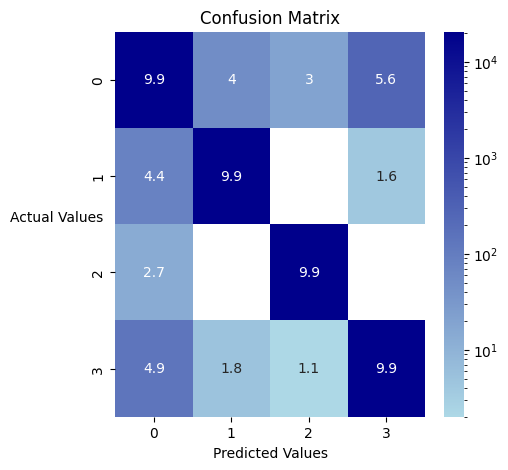

Accuracy =  0.993
Precision =  0.994
Recall =  0.996
F1-Score =  0.995
Balanced accuracy score:  0.99
Matthews Correlation Coefficient (MCC):  0.982
Negative predictive value:  0.989
False discovery rate:  0.006
Cohen kappa score:  0.991
model_evaluation method has ended
testing_kNNClassifier has ended
evaluating_knn_model method has ended


In [24]:
print("Evaluating multiclass KNN classifier on Balanced dataset.")
evaluating_knn_model(knn_model, X_balanced_test, y_balanced_test, selected_features)

# Evaluation of Imbalanced test dataset.

In [25]:
#Loading the imbalanced test dataset
imbalanced_test_cic_df=pd.read_parquet("multiclass_imbalanced_test_data.parquet")

In [26]:
imbalanced_test_cic_df.head()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
7131407,400.0,3.0,0.0,97.0,0.0,440.0,44.000000,66.483398,0.0,0.000000,...,44.000000,0.000000,3.0,97.0,0.0,0.0,8192.0,1.0,8.0,3
5064597,396502.0,3.0,2.0,97.0,232.0,584.0,119.550003,186.248688,1460.0,486.789459,...,119.550003,486.789459,3.0,97.0,2.0,232.0,8192.0,1.0,20.0,0
5116882,5750464.0,4.0,4.0,97.0,232.0,97.0,24.250000,48.500000,232.0,58.000000,...,24.250000,58.000000,4.0,97.0,4.0,232.0,8192.0,1.0,20.0,0
201601,61133.0,1.0,1.0,48.0,110.0,48.0,48.000000,0.000000,110.0,110.000000,...,48.000000,110.000000,1.0,48.0,1.0,110.0,8192.0,0.0,32.0,0
2619988,1113.0,1.0,4.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.0,0.0,4.0,0.0,8192.0,0.0,8.0,0


In [27]:
imbalanced_test_cic_df.tail()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min,attack_id
3078048,1348605.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.0,...,6.666667,241.0,3.0,20.0,4.0,964.0,8192.0,1.0,20.0,3
2853571,839685.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.0,...,6.666667,241.0,3.0,20.0,4.0,964.0,8192.0,1.0,20.0,3
2638009,5604348.0,8.0,4.0,612.0,232.0,342.0,76.500000,125.554771,1460.0,108.0,...,76.500000,108.0,8.0,612.0,4.0,232.0,8192.0,7.0,20.0,0
2808894,44197.0,3.0,4.0,26.0,232.0,20.0,8.666667,10.263203,152.0,108.0,...,8.666667,108.0,3.0,26.0,4.0,232.0,8192.0,2.0,20.0,3
1321597,259.0,2.0,2.0,72.0,322.0,36.0,36.000000,0.000000,161.0,161.0,...,36.000000,161.0,2.0,72.0,2.0,322.0,8192.0,1.0,32.0,0


In [28]:
imbalanced_test_cic_df.shape

(1734101, 46)

In [29]:
#Dividing the imbalanced test dataset into Independent and Dependent features
X_imbalanced_test=imbalanced_test_cic_df.iloc[:, 0:-1]
y_imbalanced_test=imbalanced_test_cic_df.iloc[:, -1]

In [30]:
X_imbalanced_test

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Fwd_Packets_Length_Total,Bwd_Packets_Length_Total,Fwd_Packet_Length_Max,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Mean,...,Avg_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Fwd_Win_Bytes,Fwd_Act_Data_Packets,Fwd_Seg_Size_Min
7131407,400.0,3.0,0.0,97.0,0.0,440.0,44.000000,66.483398,0.0,0.000000,...,99.500000,44.000000,0.000000,3.0,97.0,0.0,0.0,8192.0,1.0,8.0
5064597,396502.0,3.0,2.0,97.0,232.0,584.0,119.550003,186.248688,1460.0,486.789459,...,298.461548,119.550003,486.789459,3.0,97.0,2.0,232.0,8192.0,1.0,20.0
5116882,5750464.0,4.0,4.0,97.0,232.0,97.0,24.250000,48.500000,232.0,58.000000,...,41.125000,24.250000,58.000000,4.0,97.0,4.0,232.0,8192.0,1.0,20.0
201601,61133.0,1.0,1.0,48.0,110.0,48.0,48.000000,0.000000,110.0,110.000000,...,103.000000,48.000000,110.000000,1.0,48.0,1.0,110.0,8192.0,0.0,32.0
2619988,1113.0,1.0,4.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,4.0,0.0,8192.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078048,1348605.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.000000,...,140.571426,6.666667,241.000000,3.0,20.0,4.0,964.0,8192.0,1.0,20.0
2853571,839685.0,3.0,4.0,20.0,964.0,20.0,6.666667,11.547006,964.0,241.000000,...,140.571426,6.666667,241.000000,3.0,20.0,4.0,964.0,8192.0,1.0,20.0
2638009,5604348.0,8.0,4.0,612.0,232.0,342.0,76.500000,125.554771,1460.0,108.000000,...,310.500000,76.500000,108.000000,8.0,612.0,4.0,232.0,8192.0,7.0,20.0
2808894,44197.0,3.0,4.0,26.0,232.0,20.0,8.666667,10.263203,152.0,108.000000,...,99.500000,8.666667,108.000000,3.0,26.0,4.0,232.0,8192.0,2.0,20.0


In [31]:
y_imbalanced_test

,attack_id
7131407,3
5064597,0
5116882,0
201601,0
2619988,0
...,...
3078048,3
2853571,3
2638009,0
2808894,3


Evaluating multiclass KNN classifier on Imbalanced dataset.
evaluating_knn_model method has started
X_test_scaled:  [[-2.88206771e-01  0.00000000e+00 -6.66666667e-01 ...  0.00000000e+00
   0.00000000e+00 -1.20000000e+01]
 [ 1.09167057e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.05405642e+00  3.33333333e-01  6.66666667e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 3.94371432e+00  1.66666667e+00  6.66666667e-01 ...  0.00000000e+00
   3.00000000e+00  0.00000000e+00]
 [-2.55132687e-01  0.00000000e+00  6.66666667e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [-2.88313250e-01 -3.33333333e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.20000000e+01]]
testing_kNNClassifier has started
model_evaluation method has started
Confusion matrix = 
 [[712300 134029 265956 324879]
 [   578  27464     68   1053]
 [ 19610      0    349    733]
 [ 91661   2172    859 152390]]


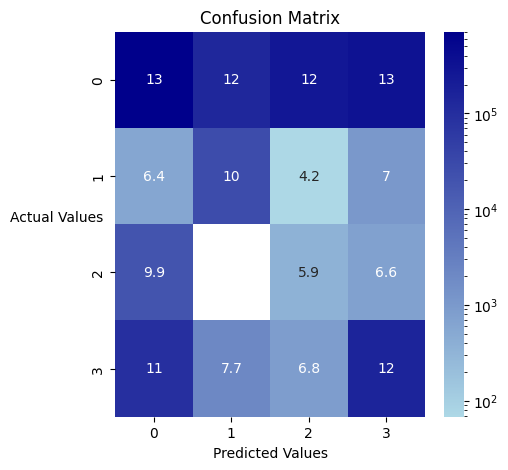

Accuracy =  0.516
Precision =  0.199
Recall =  0.617
F1-Score =  0.301
Balanced accuracy score:  0.556
Matthews Correlation Coefficient (MCC):  0.085
Negative predictive value:  0.864
False discovery rate:  0.801
Cohen kappa score:  0.138
model_evaluation method has ended
testing_kNNClassifier has ended
evaluating_knn_model method has ended


In [32]:
print("Evaluating multiclass KNN classifier on Imbalanced dataset.")
evaluating_knn_model(knn_model, X_imbalanced_test, y_imbalanced_test, selected_features)